# Exploratory Data Analysis (EDA)

### Introduction

Welcome to this hands-on session on exploratory data analysis! Today, we'll be using Python, pandas, and matplotlib to dive into a dataset about cars and uncover interesting patterns and insights.

**What is EDA?**

Exploratory Data Analysis (EDA) is like being a detective with data. We'll use various techniques to:

* **Understand the data:** What information do we have about the cars?
* **Uncover relationships:** Are there connections between price and mileage?
* **Find patterns:** Do certain car origins dominate the market?

### Setting Up

Let's make sure we have the tools ready for our investigation:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the Data

Our dataset is stored in a CSV file. We'll use pandas to read it into a DataFrame, a handy table-like structure.

In [ ]:
df = pd.read_excel('/content/automobile_dataset.xlsx')

### First Look: Peeking at the Data

Before we dive deep, let's get a quick overview of our dataset.

In [ ]:
# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n")
# Print column names and their data types
df.info()

| Make and model   | Price   | Mileage (mpg)   | Repair record 1978   | Headroom (in.)   | Trunk space (cu. ft.)   | Weight (lbs.)   | Length (in.)   | Turn circle (ft.)   | Displacement (cu. in.)   | Gear ratio   | Car origin   |
|:-----------------|:--------|:----------------|:---------------------|:-----------------|:------------------------|:----------------|:---------------|:--------------------|:-------------------------|:-------------|:-------------|
| AMC Concord      | 4099    | 22              | 3                    | 2.5              | 11                      | 2930            | 186            | 40                  | 121                      | 3.58         | Domestic     |
| AMC Pacer        | 4749    | 17              | 3                    | 3                | 11                      | 3350            | 173            | 40                  | 258                      | 2.53         | Domestic     |
| AMC Spirit       | 3799    | 22              | nan                  | 3   

**Question 1 (Multiple Choice):** Which of the following columns is not numerical?

1. Price
2. Mileage (mpg)
3. Repair record 1978
4. Car origin

**Answer:** 4

### Summary Statistics: The Big Picture

Let's calculate summary statistics for the numerical columns to get a sense of central tendencies and spread.

In [ ]:
descriptive_stats = df.describe()
print("Descriptive Statistics (excluding 'Repair record 1978'):\n")
print(descriptive_stats.to_markdown(numalign="left", stralign="left"))

Descriptive Statistics (excluding 'Repair record 1978'):

|       | Price   | Mileage (mpg)   | Repair record 1978   | Headroom (in.)   | Trunk space (cu. ft.)   | Weight (lbs.)   | Length (in.)   | Turn circle (ft.)   | Displacement (cu. in.)   | Gear ratio   |
|:------|:--------|:----------------|:---------------------|:-----------------|:------------------------|:----------------|:---------------|:--------------------|:-------------------------|:-------------|
| count | 74      | 74              | 69                   | 74               | 74                      | 74              | 74             | 74                  | 74                       | 74           |
| mean  | 6165.26 | 21.2973         | 3.4058               | 2.99324          | 13.7568                 | 3019.46         | 187.932        | 39.6486             | 197.297                  | 3.01486      |
| std   | 2949.5  | 5.7855          | 0.989932             | 0.845995         | 4.2774                  | 777.194         

**Question 2 (True/False):** The average price of the cars in the dataset is more than $5000.
**Answer:** True

### Categorical Variables: Groups and Proportions

We have a few categorical columns. Let's explore them by counting the occurrences of each unique value.

In [ ]:
# Mode, count and percentage for the 'Repair Record 1978' column
mode_repair_record = df['Repair record 1978'].mode()
count_mode_repair_record = df['Repair record 1978'].value_counts().max()
percentage_mode_repair_record = (count_mode_repair_record / df['Repair record 1978'].count()) * 100
print(f"Mode Repair Record: {mode_repair_record[0]}, Count: {count_mode_repair_record}, Percentage: {percentage_mode_repair_record:.2f}%")

# Count of occurrences for the 'Car Origin' column
car_origin_counts = df['Car origin'].value_counts()
print("Car Origin Counts:\n", car_origin_counts)

Mode Repair Record: 3.0, Count: 30, Percentage: 43.48%
Car Origin Counts:
 Car origin
Domestic    52
Foreign     22
Name: count, dtype: int64


**Student Challenge:** Calculate and print the percentage of cars from each origin.

### Visualizations: Seeing is Believing

Histograms are great for visualizing the distribution of numerical data.

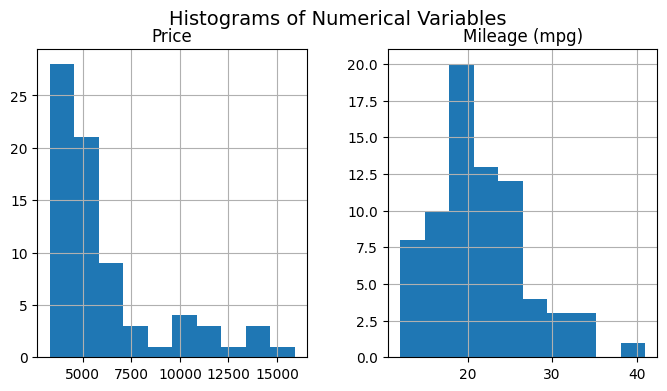

In [ ]:
# Create histograms for all numerical columns except `Repair record 1978`
df[['Price','Mileage (mpg)']].hist(figsize=(8, 4))
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()

### Relationships: Connections and Correlations

Let's see if there's any relationship between price and mileage.

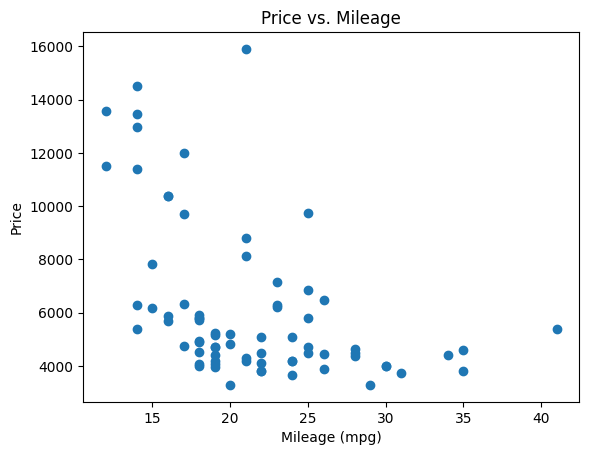

In [ ]:
# Scatterplot of price vs mileage
plt.scatter(df['Mileage (mpg)'], df['Price'])
plt.xlabel('Mileage (mpg)')
plt.ylabel('Price')
plt.title('Price vs. Mileage')
plt.show()

**Student Challenge:** Create a scatterplot to visualize the relationship between any two other numerical variables in the dataset.


---

### Deeper Analysis: Car Origins and More

Let's explore how car origins relate to price and other factors.

In [ ]:
# Calculate and print the mean and median prices for each car origin
mean_prices_by_origin = df.groupby('Car origin')['Price'].mean()
median_prices_by_origin = df.groupby('Car origin')['Price'].median()

print("Mean Prices by Origin:\n", mean_prices_by_origin.to_markdown(numalign="left", stralign="left"))
print("\nMedian Prices by Origin:\n", median_prices_by_origin.to_markdown(numalign="left", stralign="left"))

**Question 3 (Multiple Choice):** On average, which origin of cars is more expensive?

1. Domestic
2. Foreign
3. They are about the same

**Answer:** 2

#### Visualizing Price vs. Mileage by Origin

Let's create a scatter plot to see how price and mileage vary across car origins.

In [ ]:
# Filter the DataFrame for 'Domestic' and 'Foreign' origins
domestic_cars = df[df['Car origin'] == 'Domestic']
foreign_cars = df[df['Car origin'] == 'Foreign']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(domestic_cars['Mileage (mpg)'], domestic_cars['Price'], color='blue', label='Domestic')
plt.scatter(foreign_cars['Mileage (mpg)'], foreign_cars['Price'], color='orange', label='Foreign')

# Add labels and title
plt.xlabel('Mileage (mpg)')
plt.ylabel('Price')
plt.title('Price vs. Mileage by Car Origin')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Question 4 (True/False):** The scatter plot suggests that foreign cars generally have higher mileage than domestic cars.

**Answer:** False

### Impact of Repair Records

Let's focus on cars with a specific repair record and see how their prices compare.

In [ ]:
# Filter the DataFrame to include only cars with a Repair record 1978 value of 3
filtered_df = df[df['Repair record 1978'] == 3]

# Calculate and print the mean and median prices for this filtered dataset
mean_price_filtered = filtered_df['Price'].mean()
median_price_filtered = filtered_df['Price'].median()

print("\nMean Price for Cars with Repair Record 3:", mean_price_filtered)
print("Median Price for Cars with Repair Record 3:", median_price_filtered)

**Student Challenge:** Repeat the above analysis for cars with a different repair record value. Do you notice any trends in how repair records might affect prices?

### Box Plots: Distributions Across Categories

Box plots are excellent for comparing distributions across different groups. Let's use them to visualize price distributions for each car origin.

In [ ]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Create a list of price data for each car origin, 'Domestic' and 'Foreign'
price_data = [df[df['Car origin'] == origin]['Price'] for origin in df['Car origin'].unique()]

# Create a box plot using the price data for each origin
ax.boxplot(price_data)

# Set the title of the plot to 'Price Distribution by Car Origin'
ax.set_title('Price Distribution by Car Origin')

# Set the x-axis label to 'Car Origin'
ax.set_xlabel('Car Origin')

# Set the y-axis label to 'Price'
ax.set_ylabel('Price')

# Set the x-tick labels to the unique car origins
ax.set_xticklabels(df['Car origin'].unique())

# Display the plot
plt.show()

**Question 5 (Multiple Choice):** Based on the box plot, which car origin has a larger spread in prices?

1. Domestic
2. Foreign
3. They have similar spreads

**Answer:** 1